In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

train_data  = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission  = pd.read_csv('gender_submission.csv')

In [129]:
train_data.info()  # For checking the train dataset
# or
test_data.info()   # For checking the test dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Has_Cabin    891 non-null    int64  
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  Title_Miss   891 non-null    bool   
 11  Title_Mr     891 non-null    bool   
 12  Title_Mrs    891 non-null    bool   
 13  Title_Other  891 non-null    bool   
dtypes: bool(6), float64(2), int64(6)
memory usage: 61.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

In [108]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [109]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [110]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [111]:
print(train_data.head())
print(train_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [112]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


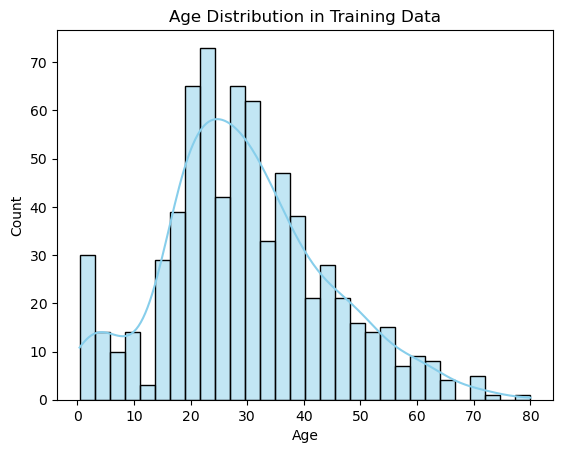

In [113]:
sns.histplot(train_data['Age'].dropna(),kde = True , bins=30 ,color= 'skyblue')
plt.title('Age Distribution in Training Data')
plt.show()

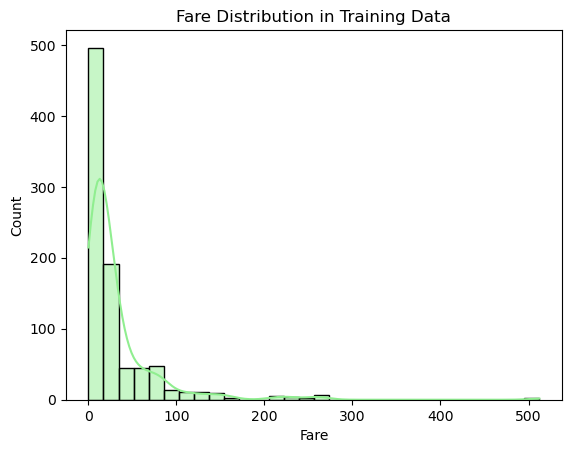

In [114]:
sns.histplot(train_data['Fare'],kde = True , bins = 30,color = 'Lightgreen')
plt.title('Fare Distribution in Training Data')
plt.show()

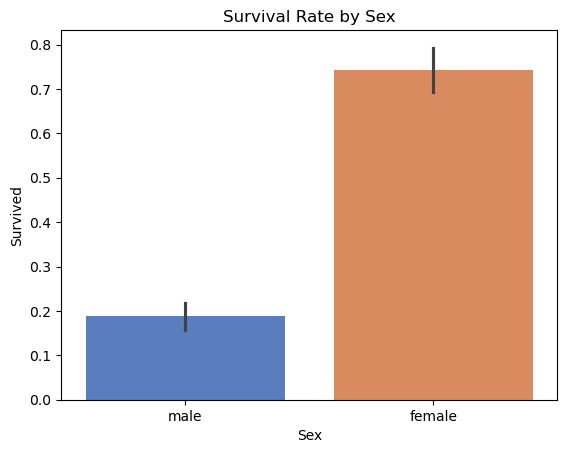

In [115]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_data, palette = 'muted')
plt.title('Survival Rate by Sex')
plt.show()

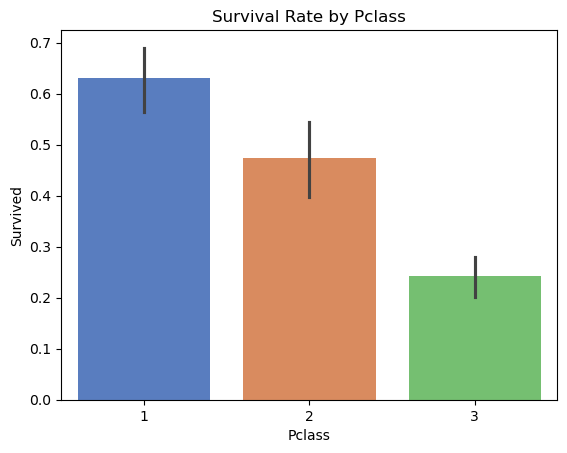

In [116]:
sns.barplot(x = 'Pclass',y = 'Survived',data = train_data,palette = 'muted')
plt.title('Survival Rate by Pclass')
plt.show()

In [117]:
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

In [118]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [119]:
test_data['Fare'].fillna(test_data['Fare'].median(),inplace = True)

In [120]:
if 'Cabin' in train_data.columns:
    train_data.drop('Cabin', axis=1, inplace=True)

if 'Cabin' in test_data.columns:
    test_data.drop('Cabin', axis=1, inplace=True)


In [121]:
# Check if 'Cabin' exists before creating 'Has_Cabin'
if 'Cabin' in train_data.columns:
    train_data['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)
else:
    print("No 'Cabin' column found in the training dataset.")

if 'Cabin' in test_data.columns:
    test_data['Has_Cabin'] = test_data['Cabin'].notnull().astype(int)
else:
    print("No 'Cabin' column found in the test dataset.")


No 'Cabin' column found in the training dataset.
No 'Cabin' column found in the test dataset.


In [122]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})


In [123]:
train_data = pd.get_dummies(train_data, columns = ['Embarked'],drop_first=True)
test_data = pd.get_dummies(test_data,columns = ['Embarked'],drop_first = True)

In [124]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [125]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.',expand = False)
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.',expand = False)

In [126]:
# Assuming you've already processed the 'Title' feature in the training data

# If you created a Title feature using Name, do the same for the test data
test_data['Title'] = test_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Apply the same title mapping to the test data
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Mlle": 7, "Major": 8, 
    "Col": 9, "Mme": 10, "Don": 11, "Lady": 12, "Countess": 13, "Jonkheer": 14, "Capt": 15, "Sir": 16, "Ms": 17
}
test_data['Title'] = test_data['Title'].map(title_mapping)

# Now encode this feature as done in the training data
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)


In [127]:
# Add missing columns to the test set if needed (e.g., Title_Mlle, Title_Mme)
for column in X_train.columns:
    if column not in X_test.columns:
        X_test[column] = 0

# Ensure the column order is the same as in training
X_test = X_test[X_train.columns]


In [128]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# 3. Feature Engineering

# Create a new feature 'Has_Cabin'
if 'Cabin' in train_data.columns:
    train_data['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)
else:
    print("No 'Cabin' column found in the training dataset.")

if 'Cabin' in test_data.columns:
    test_data['Has_Cabin'] = test_data['Cabin'].notnull().astype(int)
else:
    print("No 'Cabin' column found in the test dataset.")

# Fill missing 'Age' and 'Embarked' values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

if 'Embarked' in train_data.columns:
    train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column not found in the training dataset.")

if 'Embarked' in test_data.columns:
    test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column not found in the test dataset.")

if 'Fare' in test_data.columns:
    test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
else:
    print("'Fare' column not found in the test dataset.")

# Convert 'Sex' to numerical values
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column
if 'Embarked' in train_data.columns:
    train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

if 'Embarked' in test_data.columns:
    test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Feature engineering: Extract Title from Name
if 'Name' in train_data.columns and 'Name' in test_data.columns:
    # Extract Title
    train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Replace rare titles with 'Other'
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    train_data['Title'] = train_data['Title'].replace(rare_titles, 'Other')
    test_data['Title'] = test_data['Title'].replace(rare_titles, 'Other')

    train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

    test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

    # One-hot encoding for 'Title'
    train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
    test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)
else:
    print("'Name' column not found in the dataset. Skipping title extraction.")

# Drop unnecessary columns
columns_to_drop = ['Cabin', 'Ticket', 'PassengerId', 'Name']  # Adjust based on columns available
train_data.drop([col for col in columns_to_drop if col in train_data.columns], axis=1, inplace=True)
test_data.drop([col for col in columns_to_drop if col in test_data.columns], axis=1, inplace=True)

# Align test and train columns (test data may have fewer columns due to missing values)
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns]

# 4. Split training data into train and validation sets
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training (Logistic Regression)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 6. Model Evaluation
y_pred = logreg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[89 16]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

